In [1]:
#install packages
!pip install plotly
!pip install geopandas
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#import modules
import geopandas as gpd
import pandas as pd
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import LineString

In [3]:
#mount on google drive
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


1. Draw the map of India and use a bubble map to show the populations of all the state capital of India.

In [ ]:
#load shapefile of india using geopandas
india = gpd.read_file("/gdrive/MyDrive/Data Visualization/LAB3/India Shape/india_ds.shp")

In [ ]:
#load population data
data = pd.read_csv("/gdrive/MyDrive/Data Visualization/LAB3/city_pop_lat_long - Sheet1.csv")

In [ ]:
#merge the shapefile and the population data
merged_data = india.merge(data, left_on = "DISTRICT", right_on = "city")

In [ ]:
#create bubble map using plotly
fig = px.scatter_mapbox(merged_data,
                        lat = "latitude",
                        lon = "longitude",
                        hover_name = "city",
                        hover_data = ["population"],
                        size = "population",
                        color = "STATE",
                        color_discrete_sequence=px.colors.qualitative.Dark2,
                        zoom = 3,
                        mapbox_style="carto-positron")

fig.update_layout(title="Population of State Capitals in India")
fig.show()

Draw the connection graph of Go Air domestic flights of India from the database

In [5]:
#load flight schedule
data = pd.read_csv("/gdrive/MyDrive/Data Visualization/LAB3/Flightschedule.csv")

In [6]:
#load airport lat-long
airport_lat_lon = pd.read_csv("/gdrive/MyDrive/Data Visualization/LAB3/airport_lat_long - Sheet1.csv")

In [7]:
#extract origin and destination airports
origins = list(data["Origin"].unique())
destinations = list(data["Destination"].unique())

In [8]:
#convert into dict
airport_dict = {}
airport_list = airport_lat_lon["airport"]
airport_lat = airport_lat_lon["latitude"]
airport_lon = airport_lat_lon["longitude"]

for iter, airport_ in enumerate(airport_list):
  if airport_ not in airport_dict:
    airport_dict[airport_] = []
    airport_dict[airport_].append(float(airport_lat[iter]))
    airport_dict[airport_].append(float(airport_lon[iter]))

In [13]:
#create df for origins and destinations
origins_df = pd.DataFrame()
origins_df["airport"] = origins

origins_lat = []
origins_lon = []

for iter, airport_ in enumerate(origins_df["airport"]):
   origins_lat.append(airport_dict[airport_][0])
   origins_lon.append(airport_dict[airport_][1])

destinations_df = pd.DataFrame()
destinations_df["airport"] = destinations

destinations_lat = []
destinations_lon = []

for iter, airport_ in enumerate(destinations_df["airport"]):
   destinations_lat.append(airport_dict[airport_][0])
   destinations_lon.append(airport_dict[airport_][1])

In [39]:
#make connections
color_list = colors = [
    "#FF0000", # Red
    "#FFA500", # Orange
    "#FFFF00", # Yellow
    "#008000", # Green
    "#00FFFF", # Cyan
    "#0000FF", # Blue
    "#800080", # Purple
    "#FFC0CB", # Pink
    "#A52A2A", # Brown
    "#000000", # Black
    "#808080", # Gray
    "#FFFFFF", # White
    "#FFB6C1", # LightPink
    "#FF69B4", # HotPink
    "#CD5C5C", # IndianRed
    "#F08080", # LightCoral
    "#FA8072", # Salmon
    "#FFA07A", # LightSalmon
    "#00FF7F", # SpringGreen
    "#3CB371", # MediumSeaGreen
    "#6B8E23", # OliveDrab
    "#8FBC8F", # DarkSeaGreen
    "#4169E1", # RoyalBlue
    "#6495ED", # CornflowerBlue
    "#9370DB", # MediumPurple
    "#BA55D3", # MediumOrchid
    "#FF00FF", # Magenta
    "#EE82EE", # Violet
    "#00CED1", # DarkTurquoise
    "#1E90FF", # DodgerBlue
    "#7B68EE", # MediumSlateBlue
    "#9400D3", # DarkViolet
    "#FFD700", # Gold
    "#D2691E", # Chocolate
    "#FF8C00", # DarkOrange
    "#FF1493"  # DeepPink
]

connect_data = pd.DataFrame({
    "start_lon" : origins_lon,
    "start_lat" : origins_lat,
    "end_lon" : destinations_lon,
    "end_lat" : destinations_lat,
    "color" : color_list
})

line_gdf = gpd.GeoDataFrame(connect_data, geometry=[LineString(xy) for xy in zip(
    connect_data[['start_lon', 'start_lat']].values,
    connect_data[['end_lon', 'end_lat']].values
)])

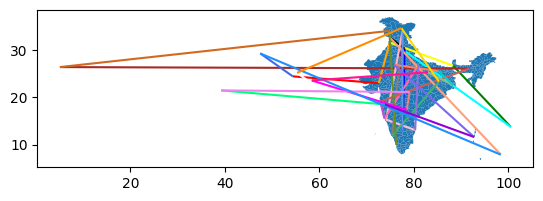

In [40]:
# Plot the map
ax = india.plot()

# Plot the connecting lines on top of the map
line_gdf.plot(ax=ax, marker=".", color=line_gdf['color'])

# Show the plot
plt.show()

NOTE: Some points lie outside the map of India because some airports (for instance Abu Dhabi) are given in the dataset but lie outside of India.

In [18]:
#origin and destination
flights = list(zip(data["Origin"], data["Destination"]))

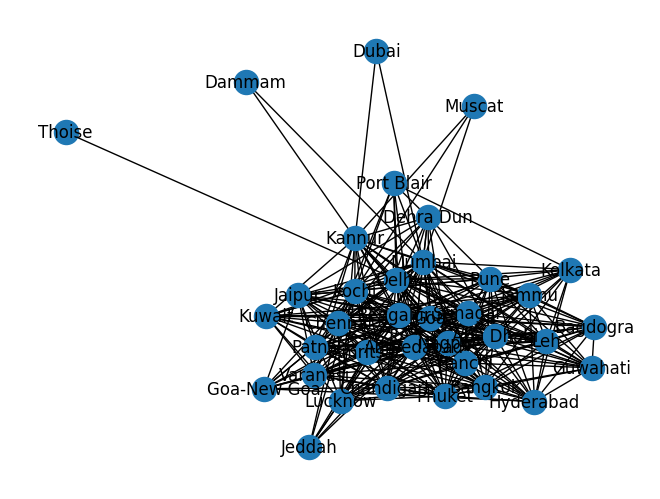

In [19]:
#create network
G = nx.Graph()
G.add_nodes_from(origins + destinations)

for flight in flights:
  G.add_edge(*flight)

nx.draw(G, with_labels=True)
plt.show()